In [9]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import heapq as hq

np.set_printoptions(precision=5,linewidth=120,suppress=True)

# the bisect module enables to easily keep an ordered list
# cf. https://docs.python.org/3.7/library/bisect.html
# useful for maintaining the OPEN list
import bisect

In [10]:
def breadthFirstSearch(graph, start_node, end_node, cost):
    """
    TO BE COMPLETED
    this function gets a graph, a start_node, end_node and cost list as entry
    and returns a path (list of nodes) as output
    it return an empty list in case of failure
    """
# ref = 
# https://www.geeksforgeeks.org/dijkstras-algorithm-for-adjacency-list-representation-greedy-algo-8/
# graph is a adjacency list
    
    def minDistance(dist,queue): 
        # Initialize min value and min_index as -1 
        minimum = np.inf
        min_index = -1
        # from the dist array,pick one which 
        # has min value and is till in queue 
        
        
        for i in range(len(dist)):
            # remember one of the index w/ inf dist
            # usually will not be used
            if dist[i] == np.inf and i in queue: 
                inf_index = i
                break
        
        for i in range(len(dist)):
            # normally we only need this
            if dist[i] < minimum and i in queue: 
                minimum = dist[i] 
                min_index = i 
        # sometimes, all vertex in queue is w/ inf dist
        if min_index == -1:
            return inf_index
        return min_index 
    
    numof_grids = len(cost) 
    dist = [np.inf] * numof_grids 
    parent = [-1] * numof_grids 

    dist[start_node] = 0

    queue = [] 
    for i in range(numof_grids): 
        queue.append(i) 

    while queue: 
        # Pick the minimum dist vertex from the set of vertices 
        # still in queue 
        u = minDistance(dist,queue)  
    
        # remove min element
        queue.remove(u) 

        for i in range(numof_grids): 
            if cost[u][i] and i in queue: 
                if dist[u] + cost[u][i] < dist[i]: 
                    dist[i] = dist[u] + cost[u][i] 
                    parent[i] = u 
        if u == end_node: break
    
    path = []
    def give_path(parent, end_node): 
        #Base Case : If j is source 
        if parent[end_node] == -1 :  
            path.append(end_node) 
            return
        give_path(parent , parent[end_node]) 
        path.append(end_node) 
    give_path(parent, end_node)
    return path
        

def depthFirstSearch(graph, start_node, end_node, cost, mazemap):
    """
    TO BE COMPLETED
    this function gets a graph, a start_node, end_node and cost list as entry
    and returns a path (list of nodes) as output
    it return an empty list in case of failure
    """
# https://www.geeksforgeeks.org/depth-first-search-or-dfs-for-a-graph/
    rowlen = len(mazemap[0])
    def neighbor(a,b):
        xa, ya = a//rowlen, a%rowlen
        xb, yb = b//rowlen, b%rowlen
        
        if (xa == xb+1 or xa == xb-1) and (ya == yb):
            return True
        if (ya == yb+1 or ya == yb-1) and (xa == xb):
            return True
        return False
        
    
    visited = set()
    path=[]
    container = []
    def dfs_util(v):
        visited.add(v)
        while path!=[] and not neighbor(v,path[-1]):
            path.pop()
        path.append(v)
        
        if v == end_node:
            for ele in path:
                container.append(ele)  # i don't know why
            return

        for u in graph[v]:
            if u not in visited:
                dfs_util(u)

    dfs_util(start_node)
    return container


from queue import PriorityQueue
def heuristic(a, b, rowlen):
    x1, y1 = a//rowlen, a%rowlen
    x2, y2 = b//rowlen, b%rowlen
    return abs(x1 - x2) + abs(y1 - y2)
def AStar(graph, start_node, end_node, world_map, cost_mat):
    """
    TO BE COMPLETED
    this function gets a graph, a start_node, end_node and cost list as entry
    and returns a path (list of nodes) as output
    it return an empty list in case of failure
    """
# ref = 
# https://www.redblobgames.com/pathfinding/a-star/implementation.html#python-astar
    rowlen = len(world_map[0])
    
    frontier = PriorityQueue()
    frontier.put(start_node, 0)
    came_from = {}
    cost_so_far = {}
    came_from[start_node] = None
    cost_so_far[start_node] = 0
    
    while not frontier.empty():
        current = frontier.get()
        
        if current == end_node:
            break
        
        for next in graph[current]:
            new_cost = cost_so_far[current] + cost_mat[current][next]
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost + heuristic(end_node,next,rowlen)
                frontier.put(next, priority)
                came_from[next] = current
    
    #return came_from#, cost_so_far
    path =[]
    go_to = end_node
    while came_from[go_to] != None:
        path.append(go_to)
        go_to = came_from[go_to]
    path.append(start_node)
    return path[::-1]


In [11]:
def display_result(world_mat, path):
    """
    This function displays a maze described in world_mat and a path inside the maze
    world_mat: a NxN matrix that contains the maze (0 for free path, -10 for obstacle)
    path: a list of elements numbered as the graph (i.e. from 0 to N**2-1)
    """
    N = world_mat.shape[0]
    display_mat = world_mat.copy()
    for el in path:
        display_mat[convert_to_matrixindex(el,N)] = 5
    plt.matshow(display_mat, cmap='Greys')
    
def convert_to_listindex(i,j,N):
    """
    This function converts a (i,j) matrix entry index to a list index for matrix of size N
    """
    return N*i+j

def convert_to_matrixindex(a,N):
    """
    This function converts a list entry a into a (i,j) matrix entry for matrix of size N
    """
    i = int(a/N) # the result of integer division
    j = int(a%N) # the  remainder of the division
    return i,j

def create_graph(world_mat):
    """
    This functions takes a NxN matrix in entry and creates a graph and a map of costs
    Since we use lists, for a world_mat of size NxN, we associate to the entry [i,j] of world_map
    the index a=N*i + j of the list
    output:
        graph: a list of neighbors  (indexed as explained above)
        cost: a N**2 x  N**2 array. Each entry cost[i,j] contains the cost of transitioning from node i to node j
            it is infinite if there is no edge from i to j
    """
    N = world_mat.shape[0]
    graph = []
    for i in range(N):
        for j in range(N):
            neigh = []
            if(i!=N-1):
                if(world_mat[i+1,j]==0):
                    neigh.append(N*(i+1)+j)
            if(i!=0):
                if(world_mat[i-1,j]==0):
                    neigh.append(N*(i-1)+j)
            if(j!=N-1):
                if(world_mat[i,j+1]==0):
                    neigh.append(N*i+j+1)
            if(j!=0):
                if(world_mat[i,j-1]==0):
                    neigh.append(N*i+j-1)
            graph.append(neigh)
    
    cost = np.ones([N*N,N*N]) * np.inf
    
    for i in range(N*N):
        for j in graph[i]:
            cost[i,j] = 1
    
    return graph, cost

[[ 0.  0.  0.  0. 10.]
 [ 0. 10. 10.  0.  0.]
 [ 0. 10.  0.  0.  0.]
 [ 0.  0.  0. 10.  0.]
 [ 0. 10. 10.  0.  0.]]


<IPython.core.display.Javascript object>


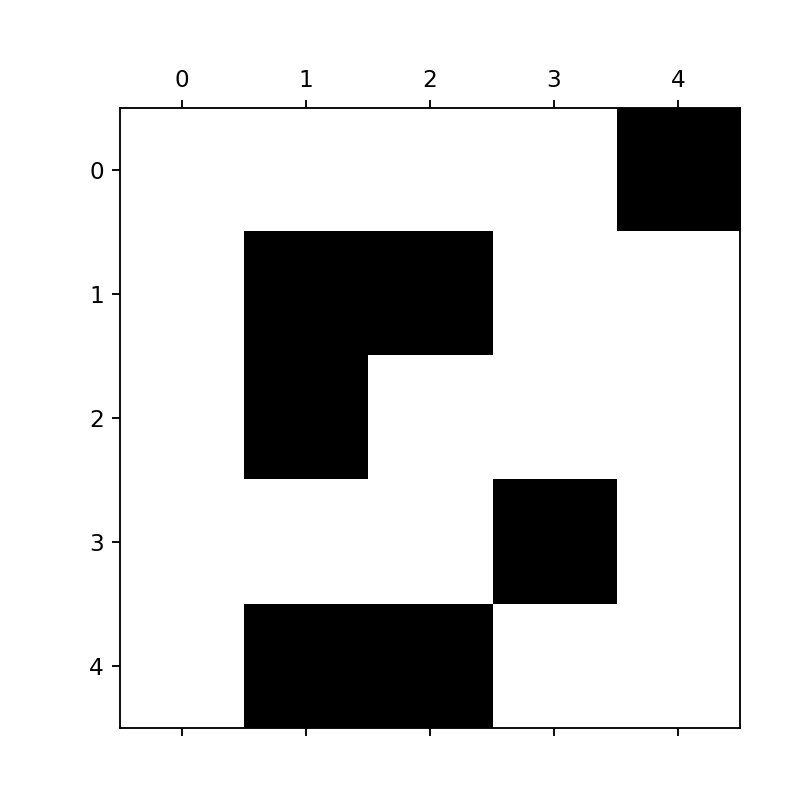

In [12]:
# let's create a map corresponding to the robot path planning example of lecture 3
# it is a 5x5 grid
world_map = np.zeros([5,5])
# and it contains obstacles which we mark as non 0
world_map[0,4] = 10
world_map[1,1:3] = 10
world_map[2,1] = 10
world_map[3,3] = 10
world_map[4,1:3] = 10

# we can print the matrix
print(world_map)

# we can now display the result
display_result(world_map, [])

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(1, 3)
(1, 4)
(2, 4)
(3, 4)
(4, 4)


<IPython.core.display.Javascript object>


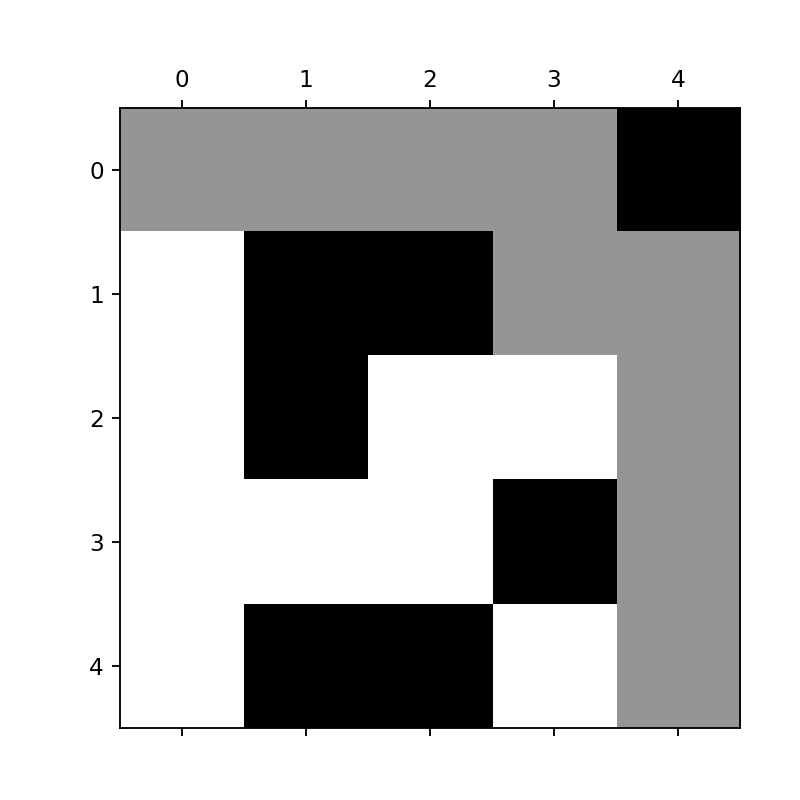

In [13]:
# let's assume we have a path from (0,0) to (4,4) that does (in linear index)
path = [0,1,2,3,8,9,14,19,24]

# we print the equivalent in matrix entries
for a in path:
    print(convert_to_matrixindex(a, 5))

# and we display it on the world grid (shown in grey)
display_result(world_map, path)

[0, 1, 2, 3, 8, 9, 14, 19, 24]


<IPython.core.display.Javascript object>


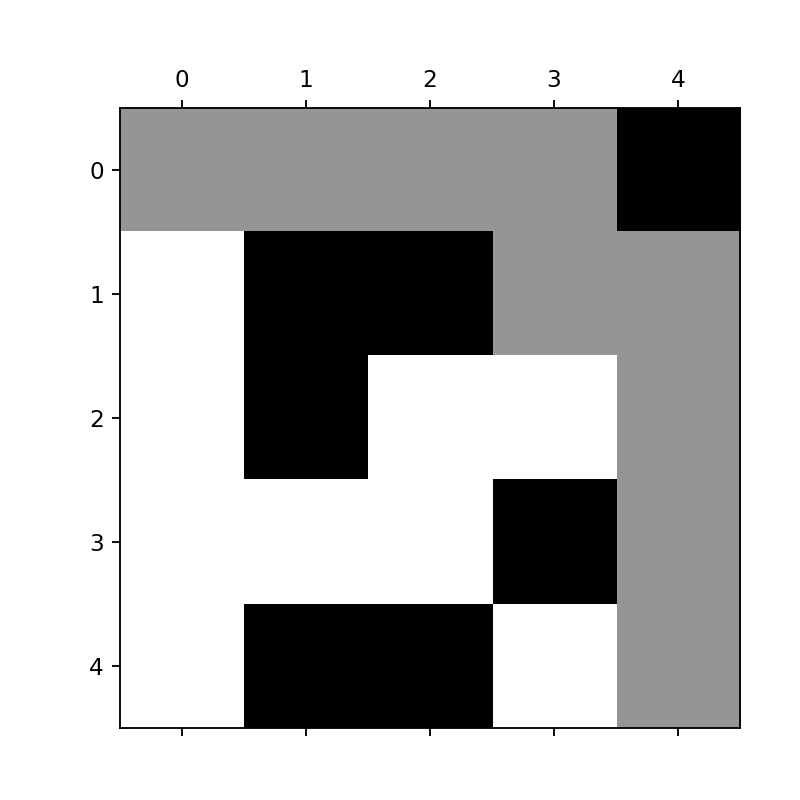

[0, 5, 10, 15, 16, 17, 12, 13, 8, 9, 14, 19, 24]


<IPython.core.display.Javascript object>


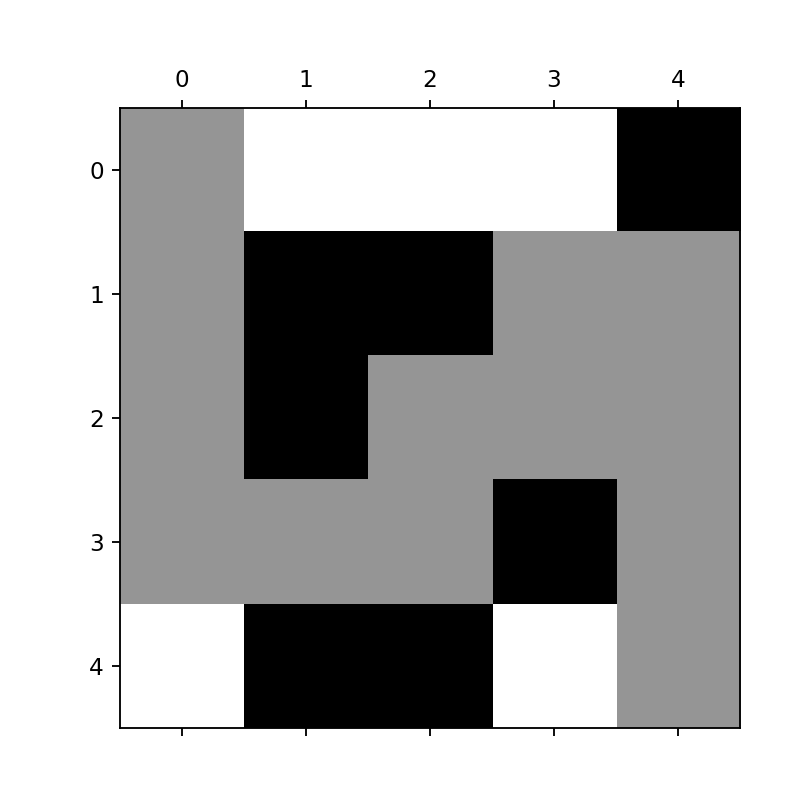

[0, 1, 2, 3, 8, 9, 14, 19, 24]


<IPython.core.display.Javascript object>


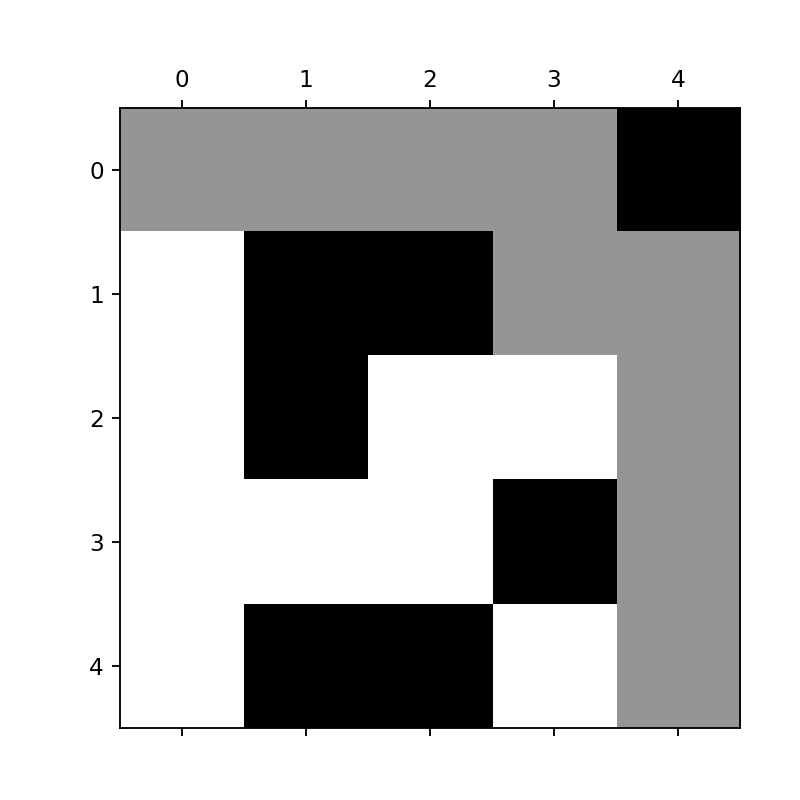

In [14]:
# test my BFS 5-by-5
adj_list, cost_mat =  create_graph(world_map)

mypath = breadthFirstSearch(adj_list, 0, 24, cost_mat)
print(mypath)
display_result(world_map, mypath)

# test my DFS on 5-by-5
adj_list, cost_mat =  create_graph(world_map)

mypath = depthFirstSearch(adj_list, 0, 24, cost_mat, world_map)
print(mypath)
display_result(world_map, mypath)

# test my A-star on 5-by-5
adj_list, cost_mat =  create_graph(world_map)

mypath = AStar(adj_list, 0, 24, world_map, cost_mat)
print(mypath)
display_result(world_map, mypath)

In [15]:
# we can also create the associated graph and costs
graph, cost = create_graph(world_map)

# the neighbors of entry the cell [0,0] are
print('Neighbors of entry [0,0]')
a = convert_to_listindex(0,0,5)
neighborhs = graph[a]
for n in neighborhs:
    print('in linear indexes: ' + str(n) + ' which corresponds to the matrix entry: ' + str(convert_to_matrixindex(n,5)))
    
print('\n\nNeighbors of entry [2,3]')
a = convert_to_listindex(2,3,5)
neighborhs = graph[a]
for n in neighborhs:
    print('in linear indexes: ' + str(n) + ' which corresponds to the matrix entry: ' + str(convert_to_matrixindex(n,5)))

Neighbors of entry [0,0]
in linear indexes: 5 which corresponds to the matrix entry: (1, 0)
in linear indexes: 1 which corresponds to the matrix entry: (0, 1)


Neighbors of entry [2,3]
in linear indexes: 8 which corresponds to the matrix entry: (1, 3)
in linear indexes: 14 which corresponds to the matrix entry: (2, 4)
in linear indexes: 12 which corresponds to the matrix entry: (2, 2)


<IPython.core.display.Javascript object>


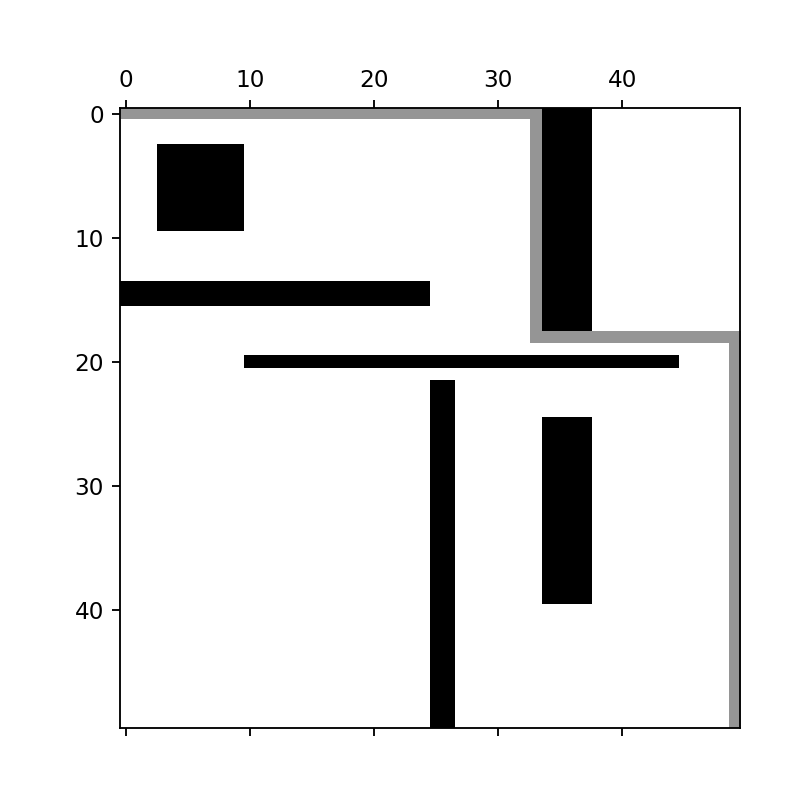

<IPython.core.display.Javascript object>


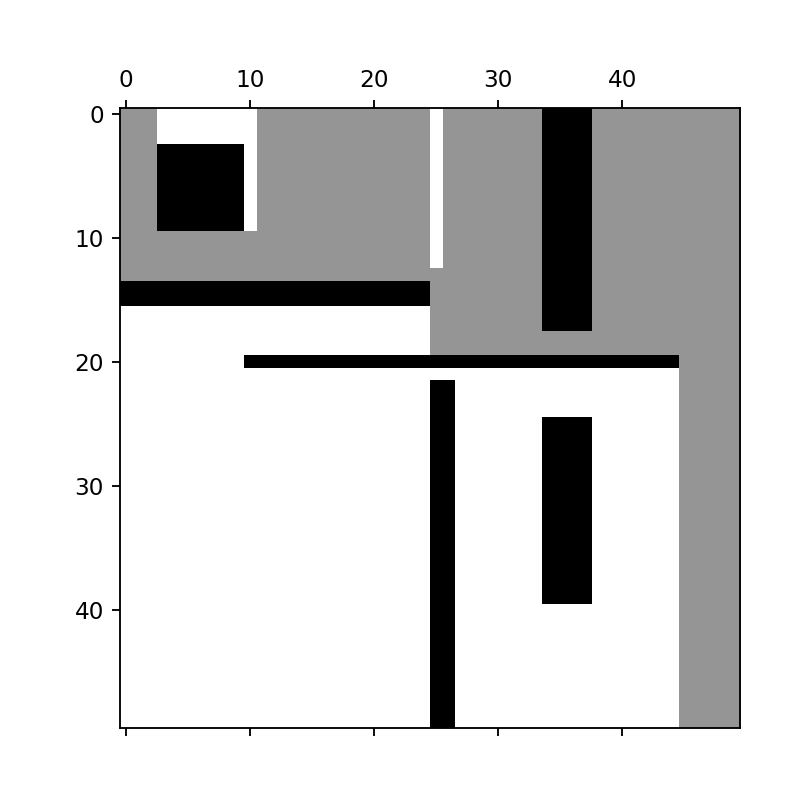

<IPython.core.display.Javascript object>


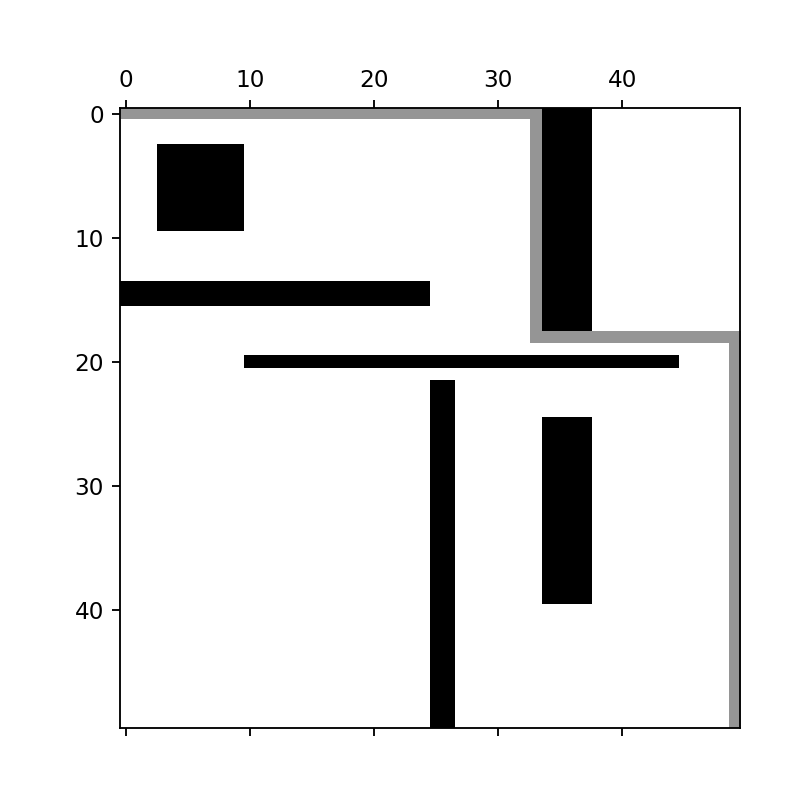

<IPython.core.display.Javascript object>


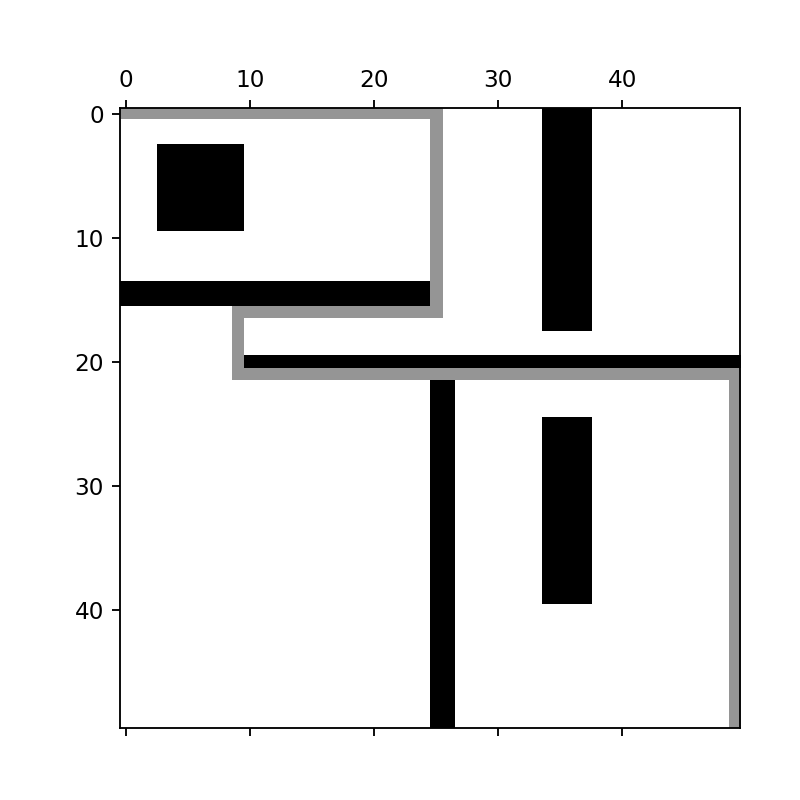

<IPython.core.display.Javascript object>


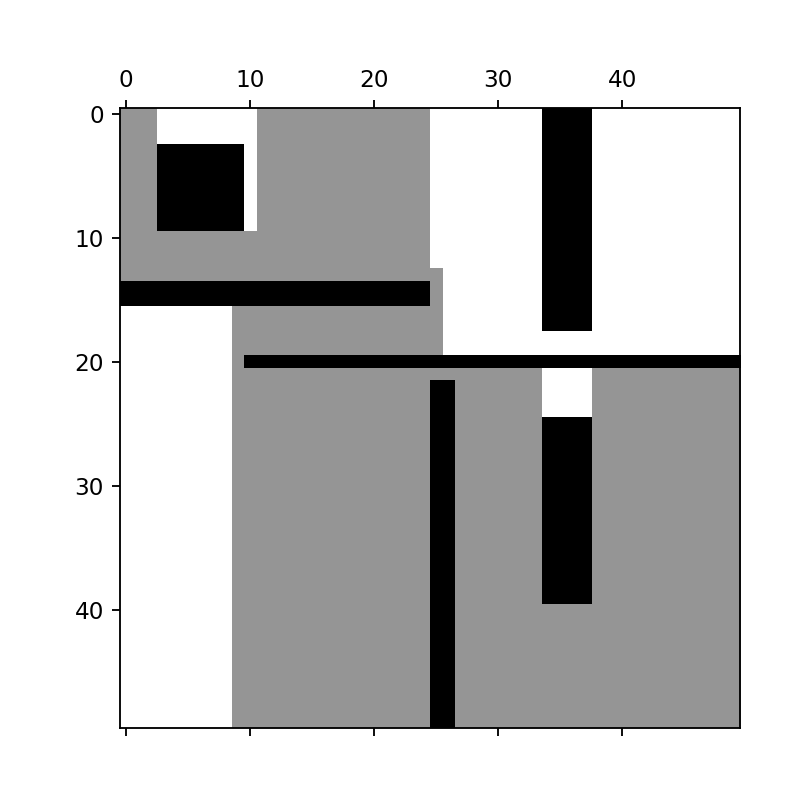

<IPython.core.display.Javascript object>


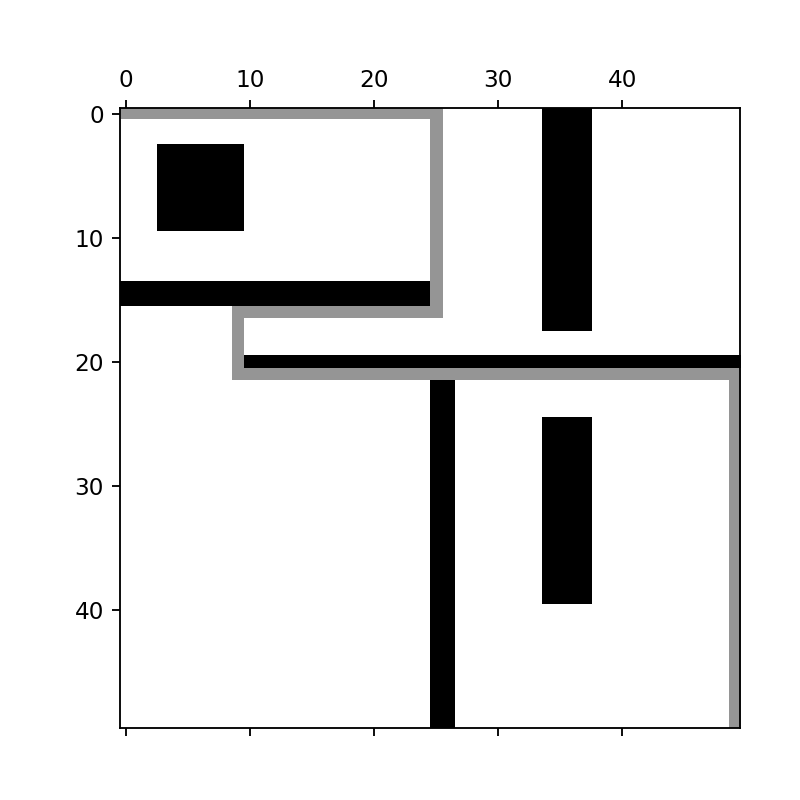

<IPython.core.display.Javascript object>


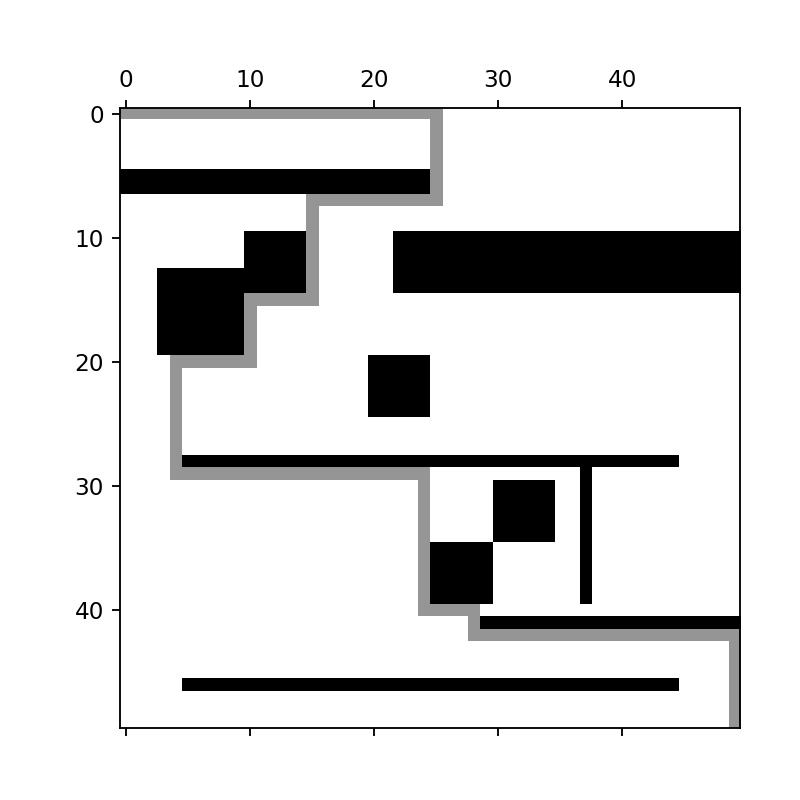

<IPython.core.display.Javascript object>


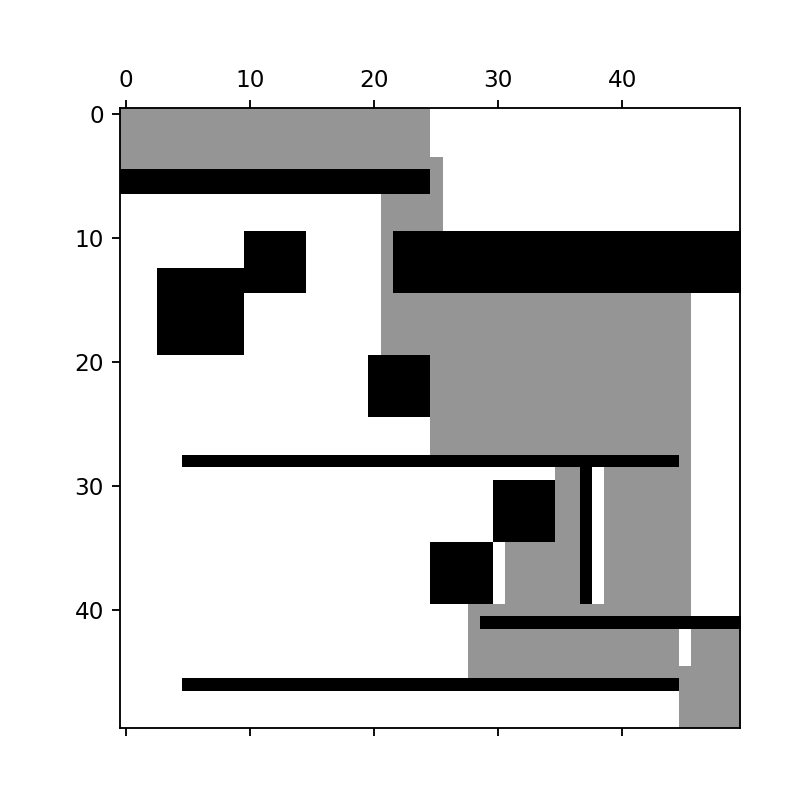

<IPython.core.display.Javascript object>


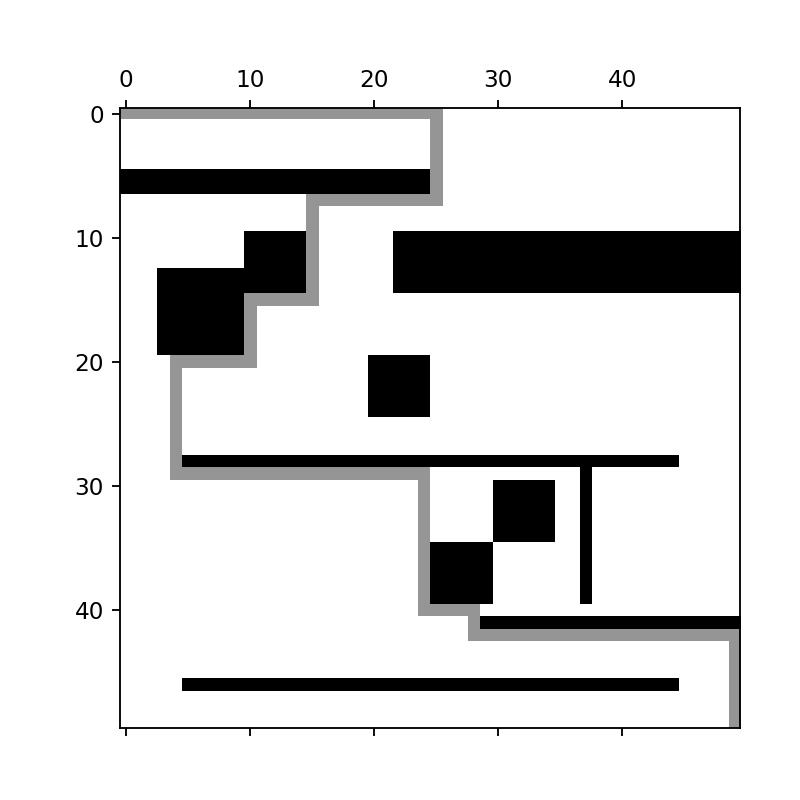

In [16]:
# here we load the 3 mazes and display them
maze1 = np.load('maze1.npy')
# display_result(maze1, [])
adj_list, cost_mat =  create_graph(maze1)

mypath1 = breadthFirstSearch(adj_list, 0, 2499, cost_mat)
display_result(maze1, mypath1)

mypath1 = depthFirstSearch(adj_list, 0, 2499, cost_mat, maze1)
display_result(maze1, mypath1)

mypath1 = AStar(adj_list, 0, 2499, maze1,cost_mat)
display_result(maze1, mypath1)

maze2 = np.load('maze2.npy')
# display_result(maze2, [])
adj_list, cost_mat =  create_graph(maze2)

mypath2 = breadthFirstSearch(adj_list, 0, 2499, cost_mat)
display_result(maze2, mypath2)

mypath2 = depthFirstSearch(adj_list, 0, 2499, cost_mat, maze2)
display_result(maze2, mypath2)

mypath2 = AStar(adj_list, 0, 2499, maze2,cost_mat)
display_result(maze2, mypath2)

maze3 = np.load('maze3.npy')
# display_result(maze3, [])
adj_list, cost_mat =  create_graph(maze3)

mypath3 = breadthFirstSearch(adj_list, 0, 2499, cost_mat)
display_result(maze3, mypath3)

mypath3 = depthFirstSearch(adj_list, 0, 2499, cost_mat, maze3)
display_result(maze3, mypath3)

mypath3 = AStar(adj_list, 0, 2499, maze3,cost_mat)
display_result(maze3, mypath3)